In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fuel_Consumption=pd.read_csv('FuelConsumptionCo2.csv')
fuel_Consumption.isna().sum()
fuel_Consumption['MODELYEAR'].unique()

array([2014], dtype=int64)

In [5]:
fuel_Consumption.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
x=fuel_Consumption.drop('CO2EMISSIONS',axis=1).copy()
y=fuel_Consumption['CO2EMISSIONS']


In [7]:
x.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


In [8]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [9]:
corr = x.corrwith(y).sort_values(ascending=False)
corr

FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
x_train.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
count,853.0,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,2014.0,3.331770,5.777257,13.276788,9.480422,11.572216,26.498242
std,0.0,1.420478,1.799739,4.147167,2.836463,3.529655,7.518151
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000
25%,2014.0,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000
50%,2014.0,3.300000,6.000000,12.500000,8.800000,10.900000,26.000000
75%,2014.0,4.300000,8.000000,15.400000,10.700000,13.200000,31.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000


In [12]:
x_train_numerical=x_train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
x_train_category=x_train.drop(['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG'],axis=1)
x_train_category.drop('MODELYEAR',axis=1,inplace=True)
x_train_category.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION'],axis=1,inplace=True)
x_train_numerical.columns

Index(['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE',
       'FUELCONSUMPTION_HWY', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


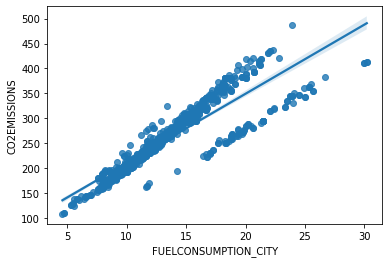

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


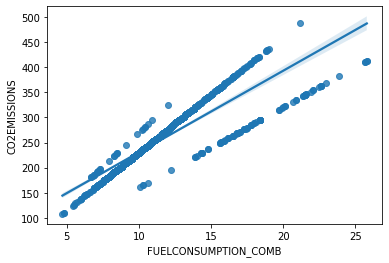

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


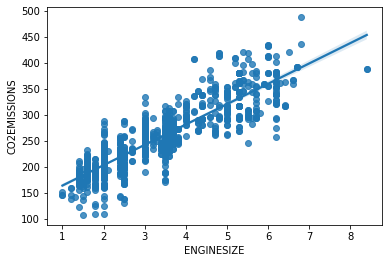

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


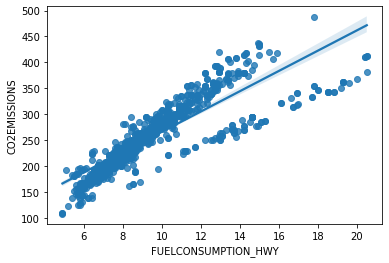

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


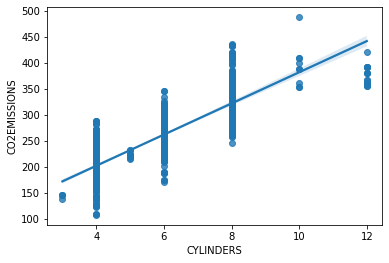

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


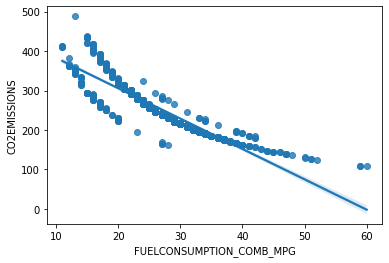

In [13]:
for i in x_train_numerical.columns:
    sns.regplot(x[i],y)
    plt.show()

In [14]:
#Fueltype
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder=OneHotEncoder()

In [16]:
x_train_category_tr=encoder.fit_transform(x_train_category)

In [17]:
x_train_category_tr=pd.DataFrame(x_train_category_tr.toarray(),columns=['D', 'E', 'X', 'Z'])

In [18]:
x_train_category_tr
x_train_category_tr.isna().sum()

D    0
E    0
X    0
Z    0
dtype: int64

In [19]:
corr = x_train_category_tr.corrwith(y).sort_values(ascending=False)
corr

D    0.073153
Z    0.024108
E    0.008748
X   -0.050762
dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale=StandardScaler()
x_train_numerical_tr=scale.fit_transform(x_train_numerical)
x_train_numerical_tr=pd.DataFrame(x_train_numerical_tr,columns=x_train_numerical.columns)
x_train_numerical_tr.head()

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,ENGINESIZE,FUELCONSUMPTION_HWY,CYLINDERS,FUELCONSUMPTION_COMB_MPG
0,-0.645828,-0.700824,-0.938101,-0.804439,-0.988088,0.599137
1,0.439886,0.461444,-0.233699,0.500768,0.123837,-0.731758
2,0.753537,0.858316,1.175104,0.994630,1.235761,-0.997937
3,-1.176622,-1.211088,-0.585900,-1.263025,-0.988088,1.663852
4,-0.042654,-0.048820,0.259382,-0.063645,0.123837,-0.199400


In [22]:
x_train_numerical_tr.isna().sum()

FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_COMB        0
ENGINESIZE                  0
FUELCONSUMPTION_HWY         0
CYLINDERS                   0
FUELCONSUMPTION_COMB_MPG    0
dtype: int64

In [23]:
x_train_final=pd.concat([x_train_numerical_tr,x_train_category_tr],axis=1)
x_train_final.head()

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,ENGINESIZE,FUELCONSUMPTION_HWY,CYLINDERS,FUELCONSUMPTION_COMB_MPG,D,E,X,Z
0,-0.645828,-0.700824,-0.938101,-0.804439,-0.988088,0.599137,0.0,0.0,0.0,1.0
1,0.439886,0.461444,-0.233699,0.500768,0.123837,-0.731758,0.0,0.0,0.0,1.0
2,0.753537,0.858316,1.175104,0.994630,1.235761,-0.997937,0.0,0.0,1.0,0.0
3,-1.176622,-1.211088,-0.585900,-1.263025,-0.988088,1.663852,0.0,0.0,1.0,0.0
4,-0.042654,-0.048820,0.259382,-0.063645,0.123837,-0.199400,0.0,0.0,1.0,0.0


In [24]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import os
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
def load_data():
	fuel_Consumption=pd.read_csv('FuelConsumptionCo2.csv')
	x=fuel_Consumption.drop('CO2EMISSIONS',axis=1).copy()
	x.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION'],axis=1,inplace=True)
	y=fuel_Consumption['CO2EMISSIONS']
	return x,y

In [27]:
def model_report(models,x_train,x_test,y_train,y_test):
	for name,model in models:
		model.fit(x_train,y_train)
		y_hat_train=model.predict(x_train)
		y_hat_test=model.predict(x_test)
		print('-'*80)
		print(f"Report for {name}")
		print()
		print(f'RMSE Train = {rmse(y_train,y_hat_train):.2f}')
		print(f'RMSE Test = {rmse(y_test,y_hat_test):.2f}')
		print()
		print(f'Accuracy Train = {r2_score(y_train,y_hat_train):.2f}')
		print(f'Accuracy Test = {r2_score(y_test,y_hat_test):.2f}')
		print('\n\n\n')

In [28]:
def rmse(y,y_hat):
	return np.sqrt(mean_squared_error(y,y_hat))

In [29]:
if __name__=="__main__":
	x,y=load_data()
	x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
	num_features=['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG']
	cat_features=['FUELTYPE']
	num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
						   ('standardscaler',StandardScaler())])
	final_pipeline=ColumnTransformer([("numerical pipeline", num_pipeline, num_features),
        							  ("categorical pipeline", OneHotEncoder(), cat_features)])
	x_train_tr = final_pipeline.fit_transform(x_train)
	cat_col = list(final_pipeline.named_transformers_['categorical pipeline'].categories_[0])

	columns=num_features+list(cat_col)
	x_train_tr=pd.DataFrame(x_train_tr,columns=columns)
	x_test_tr=final_pipeline.transform(x_test)
	x_test_tr=pd.DataFrame(x_test_tr,columns=columns)
	models = [
        ('Linear Regression', LinearRegression()),
        ('SGD Regressor', SGDRegressor()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Support Vector Machines', SVR(kernel='linear')),
        ('Random Forest', RandomForestRegressor()),
        ('K-Nearest Neighbors', KNeighborsRegressor())
    ]
model_report(models,x_train_tr,x_test_tr,y_train,y_test)


--------------------------------------------------------------------------------
Report for Linear Regression

RMSE Train = 5.36
RMSE Test = 5.57

Accuracy Train = 0.99
Accuracy Test = 0.99




--------------------------------------------------------------------------------
Report for SGD Regressor

RMSE Train = 5.52
RMSE Test = 5.94

Accuracy Train = 0.99
Accuracy Test = 0.99




--------------------------------------------------------------------------------
Report for Decision Tree

RMSE Train = 0.03
RMSE Test = 6.93

Accuracy Train = 1.00
Accuracy Test = 0.99




--------------------------------------------------------------------------------
Report for Support Vector Machines

RMSE Train = 12.79
RMSE Test = 14.93

Accuracy Train = 0.96
Accuracy Test = 0.94




--------------------------------------------------------------------------------
Report for Random Forest

RMSE Train = 1.64
RMSE Test = 7.33

Accuracy Train = 1.00
Accuracy Test = 0.99




----------------------------------

C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\saina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
